In [1]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort('symbol')

# 计算每个时刻所有 symbol 的 taker_buy_quote_volume 的总和
df = df.with_columns([
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return'),
    (pl.col("quote_volume") - pl.col('taker_buy_quote_volume')).alias("taker_sell_quote_volume")
])

# 计算每个 symbol 在每个时刻的 taker_buy_quote_volume 与总和的比例
df = df.with_columns([
    (pl.col("taker_buy_quote_volume") / pl.col("taker_sell_quote_volume")).alias("beat_ratio")
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,return,taker_sell_quote_volume,beat_ratio
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",null,2.8900e7,0.950411
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",-0.058265,4.3272e7,0.885514
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",-0.029763,3.7537e7,0.862957
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.048309,2.9169e7,0.953699
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",-0.069355,1.8366e7,0.870085
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.080426,5.2429e7,0.913591
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.037668,2.7222e7,0.968511
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.383751,2.9360e8,1.01872


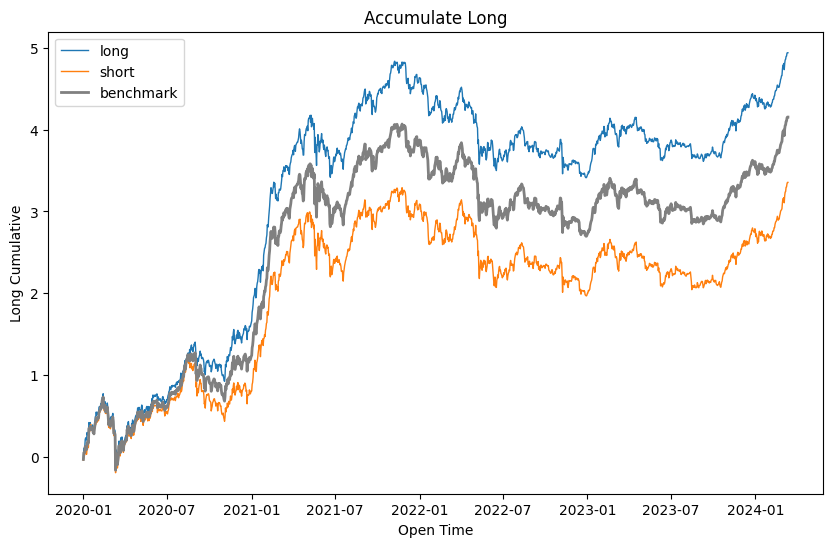

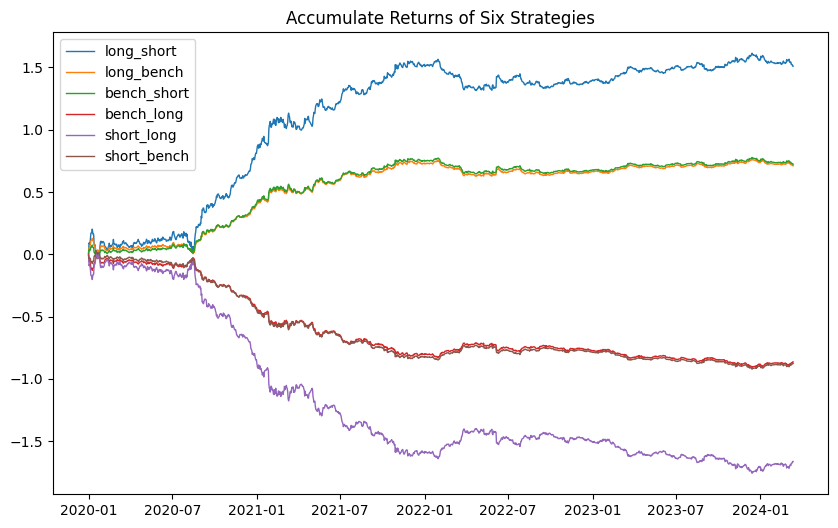

long: 
ann_return = 28.2436  sharpe = 6.2379  maxdd = 0.4989  calmar_ratio = 56.607  

short: 
ann_return = 19.1768  sharpe = 4.1034  maxdd = 0.5297  calmar_ratio = 36.2012  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 8.6288  sharpe = 7.1753  maxdd = 0.1917  calmar_ratio = 45.0142  

long_bench: 
ann_return = 4.0608  sharpe = 6.6098  maxdd = 0.1109  calmar_ratio = 36.6023  

bench_long: 
ann_return = -4.9368  sharpe = -8.0357  maxdd = 0.9084  calmar_ratio = -5.4346  

short_long: 
ann_return = -9.5048  sharpe = -7.9037  maxdd = 1.7381  calmar_ratio = -5.4684  

short_bench: 
ann_return = -5.006  sharpe = -8.4197  maxdd = 0.9238  calmar_ratio = -5.4187  

bench_short: 
ann_return = 4.13  sharpe = 6.9463  maxdd = 0.0984  calmar_ratio = 41.9596  



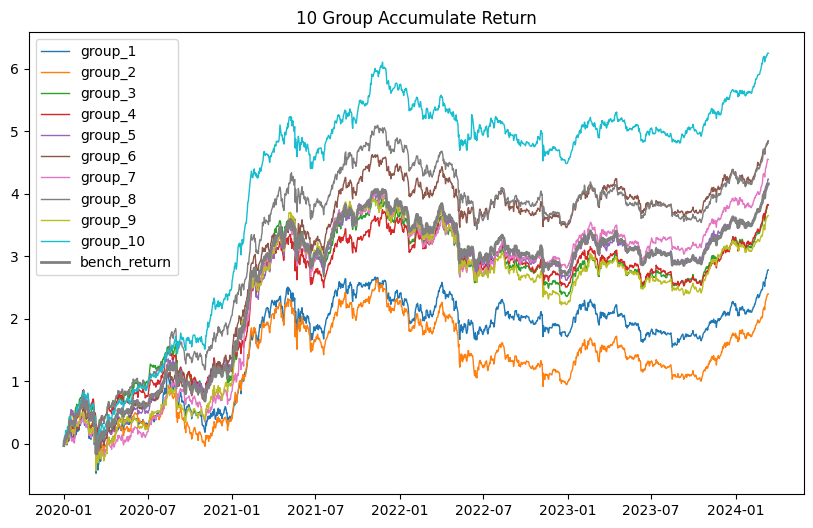

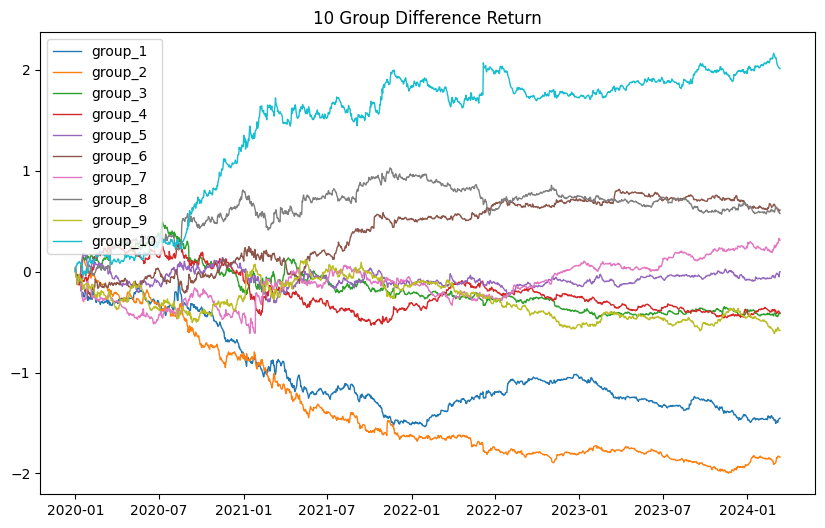

group_1: 
ann_return = 15.8783  sharpe = 3.3072  maxdd = 0.6445  calmar_ratio = 24.6369  

group_2: 
ann_return = 13.6725  sharpe = 2.769  maxdd = 0.6085  calmar_ratio = 22.4683  

group_3: 
ann_return = 21.8159  sharpe = 4.4951  maxdd = 0.443  calmar_ratio = 49.2488  

group_4: 
ann_return = 21.8327  sharpe = 4.5223  maxdd = 0.4459  calmar_ratio = 48.9658  

group_5: 
ann_return = 24.1779  sharpe = 5.1104  maxdd = 0.5198  calmar_ratio = 46.5132  

group_6: 
ann_return = 27.6758  sharpe = 5.7973  maxdd = 0.5911  calmar_ratio = 46.8204  

group_7: 
ann_return = 25.9722  sharpe = 5.2795  maxdd = 0.5915  calmar_ratio = 43.9075  

group_8: 
ann_return = 27.4824  sharpe = 5.652  maxdd = 0.4838  calmar_ratio = 56.8104  

group_9: 
ann_return = 20.8451  sharpe = 4.4417  maxdd = 0.6239  calmar_ratio = 33.4134  

group_10: 
ann_return = 35.686  sharpe = 7.6953  maxdd = 0.4466  calmar_ratio = 79.9088  

-----------------------------------------
group_difference_1: 
ann_return = -8.3045  sharpe =

In [2]:
from factor_analysis.factor_analysis import FactorAnalysis

factors = df.select(['open_time', 'symbol', 'beat_ratio'])

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()